데이터 만들기

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T  # transpose
X.shape

(200, 2)

In [3]:
rng.rand(2, 2) # (2, 2로 0부터 1 사이에 있는 값 4개 랜덤으로 뽑음)

array([[0.92578396, 0.37934938],
       [0.24110821, 0.25490198]])

In [7]:
rng.rand(2, 200)  # 표준정규분포 따르는 랜덤 수를 (2, 200) 으로 나열

array([[0.60735693, 0.79695268, 0.81266616, 0.26598051, 0.50907757,
        0.35727561, 0.76608347, 0.67764923, 0.91012951, 0.86361404,
        0.2281132 , 0.58549081, 0.10157897, 0.83182047, 0.31595699,
        0.82415017, 0.81630993, 0.37392771, 0.66208884, 0.99699842,
        0.54027792, 0.46442217, 0.73549406, 0.73842177, 0.9291713 ,
        0.40723982, 0.66338872, 0.91787788, 0.57581744, 0.24221232,
        0.00560409, 0.70730484, 0.8808238 , 0.60250184, 0.75506541,
        0.89486556, 0.31542945, 0.01701729, 0.21659728, 0.53211391,
        0.48748517, 0.28953973, 0.96447949, 0.94943269, 0.10583251,
        0.19144291, 0.7275903 , 0.14780434, 0.86879051, 0.99287996,
        0.36638578, 0.21135275, 0.5031525 , 0.94137752, 0.70542449,
        0.17736872, 0.93332249, 0.16948257, 0.13568353, 0.5943971 ,
        0.63410713, 0.07313277, 0.10921374, 0.21008439, 0.42563651,
        0.48519969, 0.74841299, 0.88810335, 0.27933598, 0.48314368,
        0.4675769 , 0.02276695, 0.2791128 , 0.06

In [8]:
np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

array([[ 0.36002424,  1.16262959],
       [ 0.26686124,  0.98229922],
       [ 0.40909773,  0.60002834],
       [ 0.02319367,  0.31180902],
       [-1.00818772, -2.18952462],
       [-0.19075184, -1.42768523],
       [ 1.24538856,  2.32779152],
       [ 0.88766243,  2.9662447 ],
       [ 0.51209146,  1.34597715],
       [ 0.86050394,  0.82228349],
       [-0.23715262,  0.03892354],
       [-0.79805058, -2.23563747],
       [-0.20759598, -0.39553023],
       [ 0.17984886,  0.02173738],
       [ 1.12883315,  2.33698025],
       [ 0.59947503,  0.97112802],
       [ 0.19283483,  0.89735148],
       [ 0.45991605, -0.28860829],
       [ 0.13150761,  0.00706724],
       [ 0.02851892, -0.47730721],
       [ 0.1145279 ,  0.70299814],
       [-0.34303144, -0.2554678 ],
       [-0.04046209,  0.05790399],
       [-0.81354312, -2.37266536],
       [-0.6132953 ,  0.36258926],
       [-0.42273349, -0.76109048],
       [ 0.66609248,  0.88464805],
       [ 0.38363183,  2.16098329],
       [-0.35079107,

(-2.346839332894307, 2.4400046646752487, -3.859118166687874, 4.08448257499405)

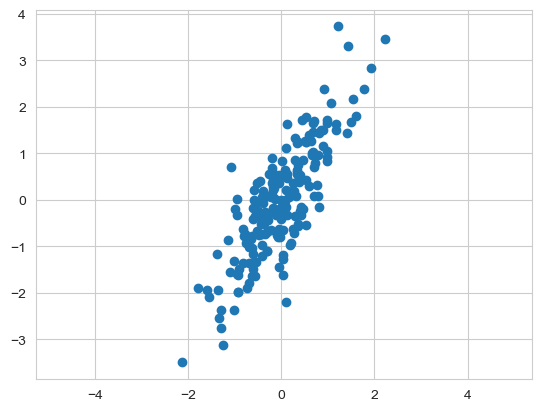

In [10]:
plt.scatter(X[:, 0], X[:,1])
plt.axis('equal')  # 두 축 같은 간격으로 그리기

fit

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

백터, 분산값

In [14]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [15]:
pca.explained_variance_  # 설명력

array([1.82531406, 0.13209947])

In [17]:
pca.explained_variance_ratio_   # 설명력 - 비율

array([0.93251326, 0.06748674])

주성분 벡터 그리기

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  # None 들어오면 ax=plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2, color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [24]:
pca.mean_  # 좌표의 중심, 데이터의 중심

array([-0.03360413, -0.03527382])

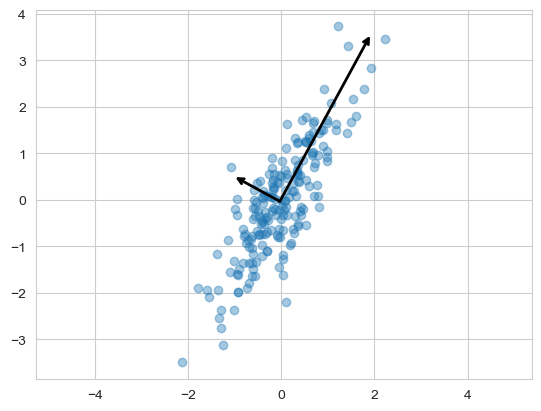

In [22]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # 세 배로 그리기
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

데이터의 주성분을 찾은 후 주축을 변경하는 것도 가능

In [25]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [26]:
pca.components_

array([[0.47802511, 0.87834617]])

In [28]:
pca.mean_

array([-0.03360413, -0.03527382])

In [29]:
pca.explained_variance_ratio_

array([0.93251326])

n_components를 1로 두면

In [30]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)
X_pca = pca.transform(X)

print(pca.components_)
print(pca.explained_variance_)

[[0.47802511 0.87834617]]
[1.82531406]


- 주요소가 하나인 데이터로 환원 (inverse transform)
- linear regression과 같은 결과일지도

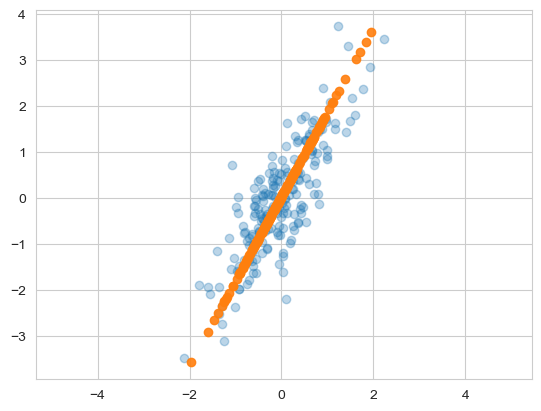

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal')
plt.show()

## 실습 - iris

- PCA 에서는 scaler 적용 중요함

In [33]:
import pandas as pd
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


특성 4개를 한 번에 확인하기는 어려움

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


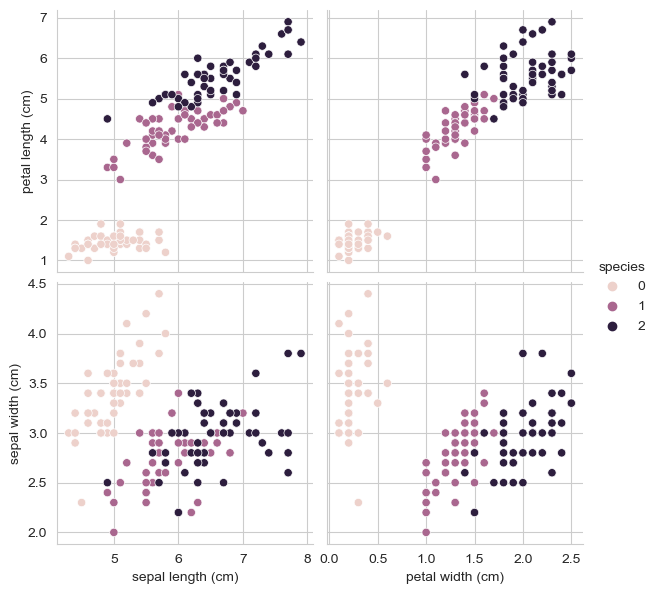

In [36]:
sns.pairplot(iris_pd, hue='species', height=3,
             x_vars=['sepal length (cm)', 'petal width (cm)'],
             y_vars=['petal length (cm)', 'sepal width (cm)']
             );

In [37]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [38]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [40]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [41]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [42]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [50]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [43]:
def get_pd_from_pca(pca_data, cols=['PC1', 'PC2']):
    return pd.DataFrame(pca_data, columns=cols)

In [44]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


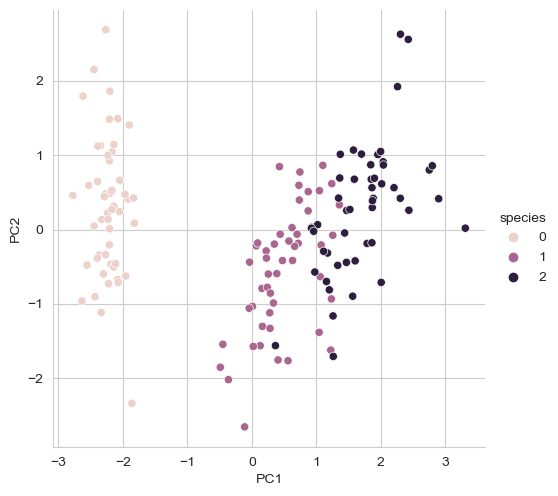

In [49]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PC1'], y_vars=['PC2']);

- 주성분 분석의 위력

4개 특성을 모두 사용해서 randomforest에 적용하면

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score: ', np.mean(scores_rf))

In [54]:
%%time
rf_scores(iris_ss, iris.target)

Score:  0.96
CPU times: user 358 ms, sys: 4.51 ms, total: 362 ms
Wall time: 363 ms


두 개의 특성(PCA) 적용

In [56]:
%%time
pca_X = iris_pd_pca[['PC1', 'PC2']]
rf_scores(pca_X, iris.target)

Score:  0.9066666666666666
CPU times: user 363 ms, sys: 4.64 ms, total: 368 ms
Wall time: 367 ms
